In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Just a formatting related plugin
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [4]:
import sys

sys.path.append("../")

<IPython.core.display.Javascript object>

In [5]:
from pathlib import Path
import pandas as pd
import numpy as np

<IPython.core.display.Javascript object>

# Run the embeddings -> ratings task using the final class

In [6]:
from snpe.embeddings.embeddings_to_ratings import EmbeddingRatingPredictor

<IPython.core.display.Javascript object>

In [7]:
model = EmbeddingRatingPredictor()

	 Device set to cpu, using torch num threads=16
Using the dense network: 
 Sequential(
  (0): Linear(in_features=100, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=64, out_features=5, bias=True)
)


<IPython.core.display.Javascript object>

In [8]:
input_df = model.process_input_data()

Merged product embeddings with review histograms and produced merged DF of shape: (13598, 8)


<IPython.core.display.Javascript object>

In [9]:
input_df.head()

,productid,embedding,asin,1,2,3,4,5
0,2398095,"[-0.00132273, 0.00133095, 0.00121696, 0.000980...",2398095,18,7,20,44,98
1,2457747,"[0.00190553, -0.000276951, 0.00347389, -0.0042...",2457747,12,4,6,23,48
2,2629881,"[0.000376349, 0.0025969, -0.00219417, 0.000960...",2629881,12,8,18,37,93
3,2621353,"[0.000548561, -0.000543399, -5.87009e-05, -0.0...",2621353,6,2,4,48,153
4,1222540,"[0.000302659, 0.000807013, -0.0032046, 0.00455...",1222540,15,4,6,27,147


<IPython.core.display.Javascript object>

In [10]:
(
    ratings,
    embeddings,
    train_loader,
    val_loader,
    train_indices,
    val_indices,
) = model.create_training_data(input_df, validation_frac=0.1, batch_size=100)

Train set size: torch.Size([12238]), Validation set size: torch.Size([1360])


<IPython.core.display.Javascript object>

In [11]:
model.fit(
    train_loader,
    val_loader,
    train_indices,
    val_indices,
    print_per_num_epochs=10,
    convergence_num_epochs=20,
)

Train Loss after epoch: 0: 30.560067510815262
Validation loss after epoch: 0: 21.62130923832164
Train Loss after epoch: 10: 5.392698626791774
Validation loss after epoch: 10: 5.293765839408426
Train Loss after epoch: 20: 5.326687329188342
Validation loss after epoch: 20: 5.296509195776546
Train Loss after epoch: 30: 5.270968090963823
Validation loss after epoch: 30: 5.268269987667308
Stopping after epoch 34 as validation loss was not improving further
Training process has finished.
Best loss: 5.142878048560199


<IPython.core.display.Javascript object>

In [12]:
model.baseline_comparison(ratings, embeddings, val_indices)

Baseline loss: 5.672391891479492 and NN model loss: 5.142878048560199
Loss improved by 9.334930419921875 percent due to NN model


<IPython.core.display.Javascript object>

In [13]:
model.save()

<IPython.core.display.Javascript object>

# Testing out model to go from embeddings to pageviews (Rough)

In [6]:
artifact_path = Path("../artifacts/marketplace")

<IPython.core.display.Javascript object>

In [7]:
product_embeddings = pd.read_csv(
    artifact_path / "productspace.tsv", sep="\t", header=None
)

<IPython.core.display.Javascript object>

In [8]:
product_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,product_2398095,-0.002865,-0.000684,-0.002542,0.000363,0.001849,-0.000197,0.000414,0.001950,0.001000,...,-0.001147,0.003627,0.001287,-0.002112,-0.000647,0.001532,-0.002348,0.000829,0.001892,-0.001235
1,product_2629881,0.000149,0.000130,-0.002689,-0.001459,-0.003907,0.000796,0.000057,0.002814,0.001077,...,0.001290,-0.001631,0.003712,-0.001252,-0.003690,0.000729,-0.000253,0.000953,0.004037,0.001679
2,product_2457747,-0.001216,-0.001465,-0.000563,0.000217,-0.000914,0.003162,0.002207,0.001228,0.000646,...,-0.002007,0.001928,0.002116,0.000269,-0.005268,0.000809,-0.000618,0.000699,0.003755,0.002715
3,product_2621353,0.001424,-0.004153,-0.002410,-0.000560,-0.000457,0.001612,-0.001776,-0.002652,0.000789,...,-0.000363,0.000071,0.003910,-0.002214,-0.006162,-0.003735,-0.002113,-0.001779,0.002668,-0.004281
4,product_2598651,-0.001779,-0.002445,-0.000949,0.001655,-0.001750,0.000759,-0.001145,0.002253,0.002503,...,0.000995,0.001093,0.000251,-0.000303,-0.001561,0.000930,0.000132,-0.003390,0.002718,0.000591


<IPython.core.display.Javascript object>

In [9]:
summaries = pd.read_csv(artifact_path / "pageview_summaries.txt", sep="\t")
summaries.head()

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,productid,VisitTimeStamp,ThisProductPurchased,ProductPrice,ProductAvgReview,ProductNumberOfReviews,bvid,hasheduaip,loadid,type,IDofMostRecentReview,WhetherMostRecentReviewWasSeen,ProductsSeen
0,3550887.0,2015-03-14 13:05:09,f,\N,0.0000,0.0,00001e38-2c31-479e-b9ee-0078bd38244e,NaN,e49d814b3f03f1cd,Product,47118474,t,"3550887,2399166,2476773"
1,3550887.0,2015-03-14 13:05:09,f,\N,NaN,NaN,00001e38-2c31-479e-b9ee-0078bd38244e,NaN,e49d814b3f03f1cd,Product,47118474,t,"3550887,2399166,2476773"
2,2399166.0,2015-03-14 13:04:13,f,\N,4.0000,3.0,00001e38-2c31-479e-b9ee-0078bd38244e,NaN,406e5ed51bb94425,Product,42593044,t,"3550887,2399166,2476773"
3,2399166.0,2015-03-14 13:04:13,f,\N,NaN,NaN,00001e38-2c31-479e-b9ee-0078bd38244e,NaN,406e5ed51bb94425,Product,42593044,t,"3550887,2399166,2476773"
4,2476773.0,2015-03-14 12:52:48,f,249.99,4.3333,3.0,00001e38-2c31-479e-b9ee-0078bd38244e,NaN,badbb477b8d204d1,Product,47115055,f,"3550887,2399166,2476773"


<IPython.core.display.Javascript object>

In [10]:
summaries.ProductAvgReview.isnull().mean()

0.6319944359347751

<IPython.core.display.Javascript object>

In [11]:
summaries.drop_duplicates(subset="productid").ProductAvgReview.isnull().mean()

0.1104329871864942

<IPython.core.display.Javascript object>

In [12]:
summaries.drop_duplicates(subset="productid").shape

(32934, 13)

<IPython.core.display.Javascript object>

In [13]:
summaries = summaries.drop_duplicates(subset=["productid"])
summaries = summaries.dropna(subset=["ProductAvgReview"])
summaries = summaries.loc[summaries.ProductAvgReview != 0, :]
print(summaries.shape, summaries.ProductAvgReview.describe())

(13090, 13) count    13090.000000
mean         4.188428
std          0.769877
min          1.000000
25%          3.991225
50%          4.346200
75%          4.692300
max          5.000000
Name: ProductAvgReview, dtype: float64


<IPython.core.display.Javascript object>

In [14]:
summaries.set_index("productid", inplace=True)
summaries.head()

,VisitTimeStamp,ThisProductPurchased,ProductPrice,ProductAvgReview,ProductNumberOfReviews,bvid,hasheduaip,loadid,type,IDofMostRecentReview,WhetherMostRecentReviewWasSeen,ProductsSeen
productid,,,,,,,,,,,,
2399166.0,2015-03-14 13:04:13,f,\N,4.0000,3.0,00001e38-2c31-479e-b9ee-0078bd38244e,NaN,406e5ed51bb94425,Product,42593044,t,"3550887,2399166,2476773"
2476773.0,2015-03-14 12:52:48,f,249.99,4.3333,3.0,00001e38-2c31-479e-b9ee-0078bd38244e,NaN,badbb477b8d204d1,Product,47115055,f,"3550887,2399166,2476773"
3191040.0,2015-03-04 13:25:22,f,269.99,4.3333,33.0,00004e69-01d5-4f8a-89e2-e2d5a40836f9,NaN,731e25598da004834,Product,46613093,f,"1374467,1393840,3191040"
1393840.0,2015-03-04 13:24:13,f,\N,4.7917,24.0,00004e69-01d5-4f8a-89e2-e2d5a40836f9,NaN,212fe1b0840a0e3eabe,Product,47066146,t,"1374467,1393840,3191040"
2441715.0,2015-03-19 20:29:55,f,\N,3.8182,11.0,00005a3b-632d-4c59-9aa6-abed8781e164,NaN,6b91d66b3b8ede223c,Product,47083216,t,2441715


<IPython.core.display.Javascript object>

In [15]:
product_embeddings[0].str.split("_").apply(lambda x: x[1])

0        2398095
1        2629881
2        2457747
3        2621353
4        2598651
          ...   
31758    3804533
31759    3564770
31760    2754622
31761    3559833
31762    3602137
Name: 0, Length: 31763, dtype: object

<IPython.core.display.Javascript object>

In [16]:
# Make a DF array with the product avg ratings and embeddings together
summaries.loc[2399166]

VisitTimeStamp                                     2015-03-14 13:04:13
ThisProductPurchased                                                 f
ProductPrice                                                        \N
ProductAvgReview                                                   4.0
ProductNumberOfReviews                                             3.0
bvid                              00001e38-2c31-479e-b9ee-0078bd38244e
hasheduaip                                                         NaN
loadid                                                406e5ed51bb94425
type                                                           Product
IDofMostRecentReview                                          42593044
WhetherMostRecentReviewWasSeen                                       t
ProductsSeen                                   3550887,2399166,2476773
Name: 2399166.0, dtype: object

<IPython.core.display.Javascript object>

In [17]:
productids = np.array(product_embeddings[0].str.split("_").apply(lambda x: x[1]))
prod_df = pd.DataFrame(
    {
        "productid": productids,
        "ProductAvgReview": [np.nan for _ in range(len(productids))],
        "embedding": [
            np.array(product_embeddings.iloc[i, 1:]) for i in range(len(productids))
        ],
    }
)

<IPython.core.display.Javascript object>

In [18]:
prod_df.head()

,productid,ProductAvgReview,embedding
0,2398095,NaN,"[-0.00286502, -0.000683531, -0.00254245, 0.000..."
1,2629881,NaN,"[0.000149213, 0.000130302, -0.00268912, -0.001..."
2,2457747,NaN,"[-0.00121576, -0.00146537, -0.000562893, 0.000..."
3,2621353,NaN,"[0.00142444, -0.00415343, -0.00240984, -0.0005..."
4,2598651,NaN,"[-0.00177867, -0.00244505, -0.000948648, 0.001..."


<IPython.core.display.Javascript object>

In [19]:
for i in range(prod_df.shape[0]):
    prod = int(prod_df["productid"][i])
    try:
        prod_df["ProductAvgReview"][i] = summaries.loc[prod]["ProductAvgReview"]
    except:
        continue

<ipython-input-19-b4e2a6fe254e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_df["ProductAvgReview"][i] = summaries.loc[prod]["ProductAvgReview"]


<IPython.core.display.Javascript object>

In [20]:
prod_df.ProductAvgReview.isnull().mean()

0.5928596165349621

<IPython.core.display.Javascript object>

In [21]:
print(prod_df.shape)
prod_df.head()

(31763, 3)


,productid,ProductAvgReview,embedding
0,2398095,NaN,"[-0.00286502, -0.000683531, -0.00254245, 0.000..."
1,2629881,4.2888,"[0.000149213, 0.000130302, -0.00268912, -0.001..."
2,2457747,4.1667,"[-0.00121576, -0.00146537, -0.000562893, 0.000..."
3,2621353,4.6929,"[0.00142444, -0.00415343, -0.00240984, -0.0005..."
4,2598651,4.0964,"[-0.00177867, -0.00244505, -0.000948648, 0.001..."


<IPython.core.display.Javascript object>

In [22]:
prod_df.dropna(subset=["ProductAvgReview"], inplace=True)
prod_df.shape

(12932, 3)

<IPython.core.display.Javascript object>

In [23]:
prod_df.head()

,productid,ProductAvgReview,embedding
1,2629881,4.2888,"[0.000149213, 0.000130302, -0.00268912, -0.001..."
2,2457747,4.1667,"[-0.00121576, -0.00146537, -0.000562893, 0.000..."
3,2621353,4.6929,"[0.00142444, -0.00415343, -0.00240984, -0.0005..."
4,2598651,4.0964,"[-0.00177867, -0.00244505, -0.000948648, 0.001..."
5,1222540,4.7787,"[0.000938418, -0.00202647, 0.000320231, 0.0012..."


<IPython.core.display.Javascript object>

# Try linear regression

In [24]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

<IPython.core.display.Javascript object>

In [25]:
model = RidgeCV(alphas=np.arange(100) / 10.0, cv=5)

<IPython.core.display.Javascript object>

In [24]:
embeddings = np.array([np.array(e) for e in prod_df.embedding])

<IPython.core.display.Javascript object>

In [25]:
embeddings.shape

(12932, 100)

<IPython.core.display.Javascript object>

In [28]:
model.fit(embeddings, np.array(prod_df.ProductAvgReview).astype("float"))

RidgeCV(alphas=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
        cv=5)

<IPython.core.display.Javascript object>

In [29]:
preds = model.predict(embeddings)

<IPython.core.display.Javascript object>

In [30]:
model.score(embeddings, np.array(prod_df.ProductAvgReview).astype("float"))

0.028058166158505204

<IPython.core.display.Javascript object>

In [31]:
mean_squared_error(preds, np.array(prod_df.ProductAvgReview).astype("float"))

0.5712711435700967

<IPython.core.display.Javascript object>

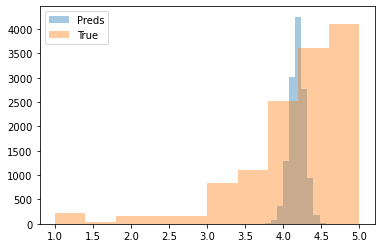

<IPython.core.display.Javascript object>

In [32]:
plt.hist(preds, alpha=0.4, label="Preds")
plt.hist(np.array(prod_df.ProductAvgReview).astype("float"), alpha=0.4, label="True")
plt.legend()

# Make a simple fully connected NN for this regression problem

In [93]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader, sampler
import copy

<IPython.core.display.Javascript object>

In [107]:
modules = [
    torch.nn.Linear(100, 64),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(64, 32),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(32, 1),
]

<IPython.core.display.Javascript object>

In [108]:
net = torch.nn.Sequential(*modules)

<IPython.core.display.Javascript object>

In [109]:
class NNModel(torch.nn.Module):
    def __init__(self):
        super(NNModel, self).__init__()
        self.net = net
        self.best_model = None
        self.best_validation_loss = np.inf

    def forward(self, x):
        y_pred = self.net(x)
        return y_pred

<IPython.core.display.Javascript object>

In [110]:
model = NNModel()

<IPython.core.display.Javascript object>

In [111]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

<IPython.core.display.Javascript object>

In [112]:
embeddings = torch.from_numpy(embeddings.astype(np.float64)).type(torch.FloatTensor)
embeddings

AttributeError: 'Tensor' object has no attribute 'astype'

<IPython.core.display.Javascript object>

In [33]:
avg_review = torch.from_numpy(
    np.array(prod_df.ProductAvgReview).astype(np.float64).reshape(-1, 1)
).type(torch.FloatTensor)
avg_review

tensor([[4.2888],
        [4.1667],
        [4.6929],
        ...,
        [4.5484],
        [3.0000],
        [5.0000]])

<IPython.core.display.Javascript object>

In [113]:
dataset = TensorDataset(embeddings, avg_review)

<IPython.core.display.Javascript object>

In [114]:
avg_review.shape

torch.Size([12932, 1])

<IPython.core.display.Javascript object>

In [115]:
validation_fraction = 0.2
num_total_examples = len(embeddings)
num_training_examples = int((1 - validation_fraction) * num_total_examples)
num_validation_examples = num_total_examples - num_training_examples

permuted_indices = torch.randperm(num_total_examples)
train_indices, val_indices = (
    permuted_indices[:num_training_examples],
    permuted_indices[num_training_examples:],
)
train_indices, val_indices

(tensor([6002, 7425, 7349,  ..., 7182, 4189,  195]),
 tensor([11597, 10151,   287,  ..., 10293,  3611,  8602]))

<IPython.core.display.Javascript object>

In [116]:
train_indices.shape, val_indices.shape

(torch.Size([10345]), torch.Size([2587]))

<IPython.core.display.Javascript object>

In [117]:
dataloader_kwargs = None
training_batch_size = 50

train_loader_kwargs = {
    "batch_size": min(training_batch_size, num_training_examples),
    "drop_last": True,
    "sampler": sampler.SubsetRandomSampler(train_indices),
}
train_loader_kwargs = (
    dict(train_loader_kwargs, **dataloader_kwargs)
    if dataloader_kwargs is not None
    else train_loader_kwargs
)
val_loader_kwargs = {
    "batch_size": min(training_batch_size, num_validation_examples),
    "shuffle": False,
    "drop_last": True,
    "sampler": sampler.SubsetRandomSampler(val_indices),
}
val_loader_kwargs = (
    dict(val_loader_kwargs, **dataloader_kwargs)
    if dataloader_kwargs is not None
    else val_loader_kwargs
)

<IPython.core.display.Javascript object>

In [118]:
train_loader = DataLoader(dataset, **train_loader_kwargs)
val_loader = DataLoader(dataset, **val_loader_kwargs)

<IPython.core.display.Javascript object>

In [119]:
def converged(epoch, stop_after_epochs, validation_loss, model):
    converged = False
    # (Re)-start the epoch count with the first epoch or any improvement.
    if epoch == 0 or validation_loss < model.best_validation_loss:
        model.best_validation_loss = validation_loss
        epochs_since_last_improvement = 0
        model.best_model = copy.deepcopy(model.net.state_dict())
    else:
        epochs_since_last_improvement += 1

    # If no validation improvement over many epochs, stop training.
    if epochs_since_last_improvement > stop_after_epochs - 1:
        model.net.load_state_dict(model.best_model)
        converged = True
    return converged

<IPython.core.display.Javascript object>

In [120]:
# Run the training loop
for epoch in range(500):  # 5 epochs at maximum
    model.train()

    # Set current loss value
    train_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, (inputs, targets) in enumerate(train_loader):

        # Zero the gradients
        optimizer.zero_grad()

        # Perform forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, targets)

        # Perform backward pass
        loss.backward()

        # Perform optimization
        optimizer.step()

        # Print statistics
        train_loss += loss.item()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(val_loader):
            preds = model(inputs)
            loss = criterion(preds, targets)
            val_loss += loss.item()

    if epoch % 50 == 0:
        print(f"Train Loss after epoch: {epoch}: {train_loss}")
        print(f"Validation loss after epoch: {epoch}: {val_loss}")
    if converged(epoch, 10, val_loss, model):
        print(
            f"Stopping after epoch {epoch} as validation loss was not improving further"
        )
        break

# Process is complete.
print("Training process has finished.")

Train Loss after epoch: 0: 3643.159719467163
Validation loss after epoch: 0: 874.5367641448975
Train Loss after epoch: 50: 118.34322229027748
Validation loss after epoch: 50: 29.035150289535522
Train Loss after epoch: 100: 117.62245832383633
Validation loss after epoch: 100: 28.454196631908417
Train Loss after epoch: 150: 117.27840664982796
Validation loss after epoch: 150: 28.784251049160957
Train Loss after epoch: 200: 116.80457846820354
Validation loss after epoch: 200: 28.65180441737175
Train Loss after epoch: 250: 116.29876007139683
Validation loss after epoch: 250: 28.712354853749275
Train Loss after epoch: 300: 115.99809743463993
Validation loss after epoch: 300: 28.757097333669662
Train Loss after epoch: 350: 116.30488027632236
Validation loss after epoch: 350: 29.144062608480453
Train Loss after epoch: 400: 116.04233054816723
Validation loss after epoch: 400: 29.01528236269951
Train Loss after epoch: 450: 115.55040518939495
Validation loss after epoch: 450: 29.364018738269806


<IPython.core.display.Javascript object>

In [121]:
model.eval()
with torch.no_grad():
    preds = model(embeddings).detach().numpy()

<IPython.core.display.Javascript object>

In [122]:
preds

array([[4.2359776],
       [4.2266316],
       [4.2367597],
       ...,
       [4.2432904],
       [4.335095 ],
       [4.236194 ]], dtype=float32)

<IPython.core.display.Javascript object>

(array([ 214.,   35.,  163.,  159.,  162.,  804., 1085., 2589., 3607.,
        4114.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

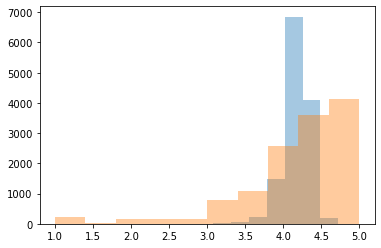

<IPython.core.display.Javascript object>

In [123]:
plt.hist(preds, alpha=0.4, label="Pred")
plt.hist(avg_review.detach().numpy(), alpha=0.4, label="True")

# Now try a NN regression when exact review counts are known 

In [668]:
review_df = pd.read_csv(artifact_path / "rating_histogram_all.txt", sep="\t")
review_df.head()

,asin,1,2,3,4,5
0,218915,1,0,0,0,0
1,292595,0,0,1,1,5
2,397494,1,0,0,0,0
3,500177,0,0,0,1,2
4,522870,1,0,2,3,4


<IPython.core.display.Javascript object>

In [669]:
prod_df["productid"] = prod_df["productid"].astype("int")

<IPython.core.display.Javascript object>

In [670]:
merged_df = pd.merge(
    prod_df, review_df, how="inner", left_on="productid", right_on="asin"
)

<IPython.core.display.Javascript object>

In [671]:
merged_df.shape

(11284, 9)

<IPython.core.display.Javascript object>

In [672]:
merged_df.head()

,productid,ProductAvgReview,embedding,asin,1,2,3,4,5
0,2629881,4.2888,"[0.000149213, 0.000130302, -0.00268912, -0.001...",2629881,12,8,18,37,93
1,2457747,4.1667,"[-0.00121576, -0.00146537, -0.000562893, 0.000...",2457747,12,4,6,23,48
2,2621353,4.6929,"[0.00142444, -0.00415343, -0.00240984, -0.0005...",2621353,6,2,4,48,153
3,2598651,4.0964,"[-0.00177867, -0.00244505, -0.000948648, 0.001...",2598651,42,23,13,58,158
4,1222540,4.7787,"[0.000938418, -0.00202647, 0.000320231, 0.0012...",1222540,15,4,6,27,147


<IPython.core.display.Javascript object>

In [673]:
from torch.special import digamma, gammaln

<IPython.core.display.Javascript object>

In [674]:
def kl(alpha, beta):
    return (
        gammaln(alpha.sum(axis=1))
        - torch.sum(gammaln(alpha), axis=1)
        - gammaln(beta.sum(axis=1))
        + torch.sum(gammaln(beta), axis=1)
        + torch.sum(
            (alpha - beta) * (digamma(alpha) - digamma(alpha.sum(axis=1))[:, None]),
            axis=1,
        )
    )

<IPython.core.display.Javascript object>

In [675]:
# Add 1 to the ratings as sometimes they are 0. Then it is a problem with KL divergence calculation
ratings = np.array(merged_df.loc[:, ["1", "2", "3", "4", "5"]].astype("int")) + 1
ratings

array([[ 13,   9,  19,  38,  94],
       [ 13,   5,   7,  24,  49],
       [  7,   3,   5,  49, 154],
       ...,
       [  2,   1,   1,   1,   4],
       [  2,   1,   1,   1,   2],
       [  1,   1,   1,   1,   2]])

<IPython.core.display.Javascript object>

In [676]:
ratings = torch.from_numpy(ratings).type(torch.FloatTensor)
ratings

tensor([[ 13.,   9.,  19.,  38.,  94.],
        [ 13.,   5.,   7.,  24.,  49.],
        [  7.,   3.,   5.,  49., 154.],
        ...,
        [  2.,   1.,   1.,   1.,   4.],
        [  2.,   1.,   1.,   1.,   2.],
        [  1.,   1.,   1.,   1.,   2.]])

<IPython.core.display.Javascript object>

In [677]:
embeddings = torch.from_numpy(
    np.array([np.array(e).astype("float") for e in merged_df.embedding])
).type(torch.FloatTensor)
embeddings

tensor([[ 0.0001,  0.0001, -0.0027,  ...,  0.0010,  0.0040,  0.0017],
        [-0.0012, -0.0015, -0.0006,  ...,  0.0007,  0.0038,  0.0027],
        [ 0.0014, -0.0042, -0.0024,  ..., -0.0018,  0.0027, -0.0043],
        ...,
        [-0.0136, -0.0093,  0.0083,  ..., -0.0255,  0.0027, -0.0097],
        [-0.0133, -0.0195, -0.0198,  ...,  0.0014, -0.0079,  0.0077],
        [ 0.0004,  0.0004,  0.0007,  ...,  0.0020,  0.0008, -0.0012]])

<IPython.core.display.Javascript object>

In [712]:
modules = [
    torch.nn.Linear(100, 256),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(256, 128),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(128, 64),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(64, 5),
]

<IPython.core.display.Javascript object>

In [713]:
net = torch.nn.Sequential(*modules)

<IPython.core.display.Javascript object>

In [714]:
class NNModel(torch.nn.Module):
    def __init__(self):
        super(NNModel, self).__init__()
        self.net = net
        self.best_model = None
        self.best_validation_loss = np.inf
        self.epochs_since_last_improvement = 0

    def forward(self, x):
        y_pred = self.net(x)
        # Exponentiate the outputs to ensure they are > 0
        y_pred = torch.exp(y_pred)
        return y_pred

<IPython.core.display.Javascript object>

In [715]:
model = NNModel()

<IPython.core.display.Javascript object>

In [716]:
criterion = kl
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

<IPython.core.display.Javascript object>

In [717]:
dataset = TensorDataset(embeddings, ratings)

<IPython.core.display.Javascript object>

In [718]:
validation_fraction = 0.1
num_total_examples = len(embeddings)
num_training_examples = int((1 - validation_fraction) * num_total_examples)
num_validation_examples = num_total_examples - num_training_examples

permuted_indices = torch.randperm(num_total_examples)
train_indices, val_indices = (
    permuted_indices[:num_training_examples],
    permuted_indices[num_training_examples:],
)
train_indices, val_indices

(tensor([ 4804,  7090,  2382,  ...,  4883, 10816,  2946]),
 tensor([ 4439,  1965, 11277,  ...,    41,  9568,  4099]))

<IPython.core.display.Javascript object>

In [719]:
train_indices.shape, val_indices.shape

(torch.Size([10155]), torch.Size([1129]))

<IPython.core.display.Javascript object>

In [720]:
dataloader_kwargs = None
training_batch_size = 50

train_loader_kwargs = {
    "batch_size": min(training_batch_size, num_training_examples),
    "drop_last": True,
    "sampler": sampler.SubsetRandomSampler(train_indices),
}
train_loader_kwargs = (
    dict(train_loader_kwargs, **dataloader_kwargs)
    if dataloader_kwargs is not None
    else train_loader_kwargs
)
val_loader_kwargs = {
    "batch_size": min(training_batch_size, num_validation_examples),
    "shuffle": False,
    "drop_last": True,
    "sampler": sampler.SubsetRandomSampler(val_indices),
}
val_loader_kwargs = (
    dict(val_loader_kwargs, **dataloader_kwargs)
    if dataloader_kwargs is not None
    else val_loader_kwargs
)

<IPython.core.display.Javascript object>

In [721]:
train_loader = DataLoader(dataset, **train_loader_kwargs)
val_loader = DataLoader(dataset, **val_loader_kwargs)

<IPython.core.display.Javascript object>

In [722]:
def converged(epoch, stop_after_epochs, validation_loss, model):
    converged = False
    # (Re)-start the epoch count with the first epoch or any improvement.
    if epoch == 0 or validation_loss < model.best_validation_loss:
        model.best_validation_loss = validation_loss
        model.epochs_since_last_improvement = 0
        model.best_model = copy.deepcopy(model.net.state_dict())
    else:
        model.epochs_since_last_improvement += 1

    # If no validation improvement over many epochs, stop training.
    if model.epochs_since_last_improvement > stop_after_epochs - 1:
        model.net.load_state_dict(model.best_model)
        converged = True
    return converged

<IPython.core.display.Javascript object>

In [723]:
# Run the training loop
for epoch in range(500):  # 5 epochs at maximum
    model.train()

    # Set current loss value
    train_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, (inputs, targets) in enumerate(train_loader):

        # Zero the gradients
        optimizer.zero_grad()

        # Perform forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, targets).mean()

        # Perform backward pass
        loss.backward()

        # Perform optimization
        optimizer.step()

        # Print statistics
        train_loss += loss.item() * len(inputs)

    train_loss /= len(train_indices)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(val_loader):
            preds = model(inputs)
            loss = criterion(preds, targets).mean()
            val_loss += loss.item() * len(inputs)
        val_loss /= len(val_indices)

    if epoch % 50 == 0:
        print(f"Train Loss after epoch: {epoch}: {train_loss}")
        print(f"Validation loss after epoch: {epoch}: {val_loss}")
    if converged(epoch, 50, val_loss, model):
        print(
            f"Stopping after epoch {epoch} as validation loss was not improving further"
        )
        break

# Process is complete.
print("Training process has finished.")
print(f"Best loss: {model.best_validation_loss}")

Train Loss after epoch: 0: 28.696621087664514
Validation loss after epoch: 0: 15.830731708671902
Train Loss after epoch: 50: 5.201503834895815
Validation loss after epoch: 50: 5.325802941571515
Train Loss after epoch: 100: 4.285095430606107
Validation loss after epoch: 100: 5.333335764963507
Stopping after epoch 132 as validation loss was not improving further
Training process has finished.
Best loss: 5.09647601890395


<IPython.core.display.Javascript object>

In [696]:
model.eval()
with torch.no_grad():
    outputs = model(embeddings[:5])
    print(kl(outputs, ratings[:5]))

tensor([ 4.1850,  1.7424, 23.7996, 19.3998, 20.1095])


<IPython.core.display.Javascript object>

In [697]:
gammaln(outputs)


tensor([[ 2.7065,  0.3074,  2.0327, 20.7470, 62.8881],
        [ 2.3915,  0.2520,  1.8001, 18.1498, 54.5174],
        [ 2.6172,  0.2925,  1.9780, 20.1015, 60.4683],
        [ 2.5031,  0.2714,  1.8819, 19.0222, 57.4996],
        [ 2.7197,  0.3101,  2.0448, 20.8684, 63.2995]])

<IPython.core.display.Javascript object>

In [698]:
inputs

tensor([[ 0.0193,  0.0311,  0.0068,  ...,  0.0087,  0.0058, -0.0268],
        [-0.0008, -0.0651,  0.0018,  ...,  0.0317, -0.0021, -0.0252],
        [ 0.0032,  0.0172,  0.0141,  ..., -0.0398, -0.0284, -0.0166],
        ...,
        [ 0.0070, -0.0199, -0.0136,  ..., -0.0250,  0.0004,  0.0284],
        [-0.0087,  0.0169, -0.0195,  ...,  0.0076,  0.0370,  0.0318],
        [-0.0181,  0.0226, -0.0023,  ...,  0.0106, -0.0327, -0.0270]])

<IPython.core.display.Javascript object>

In [699]:
targets

tensor([[  1.,   1.,   1.,   1.,   6.],
        [  2.,   1.,   1.,   2.,   9.],
        [  1.,   2.,   1.,   1.,   2.],
        [  3.,   2.,   4.,   4.,   4.],
        [  1.,   1.,   1.,   1.,   3.],
        [  1.,   1.,   1.,   1.,   2.],
        [  1.,   1.,   1.,   3.,  14.],
        [  4.,   1.,  10.,  16.,  33.],
        [  3.,   1.,   2.,   1.,   5.],
        [  1.,   1.,   1.,   1.,   2.],
        [  1.,   1.,   1.,   1.,   2.],
        [  6.,   2.,   5.,  15.,  39.],
        [ 19.,   8.,   8.,  17.,  11.],
        [  9.,   2.,   5.,  20., 248.],
        [  1.,   1.,   1.,   1.,   3.],
        [  2.,   1.,   1.,   1.,   1.],
        [  1.,   1.,   2.,   7.,  32.],
        [  3.,   1.,   2.,   6.,  15.],
        [  4.,   2.,   3.,   1.,   3.],
        [  1.,   1.,   2.,   5.,   7.],
        [  2.,   1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   5.,   7.],
        [  1.,   2.,   1.,   1.,   2.],
        [  1.,   1.,   1.,   1.,   2.],
        [  1.,   3.,   7.,   9.,  21.],


<IPython.core.display.Javascript object>

In [700]:
model(inputs)

tensor([[ 5.2424,  2.7415,  4.7394, 16.5629, 34.1942],
        [ 4.8815,  2.5691,  4.2172, 13.4812, 29.0481],
        [ 4.4172,  2.4572,  4.0340, 12.4516, 24.1641],
        [ 3.0491,  1.9080,  2.7941,  6.3545, 11.0690],
        [ 3.0723,  1.9101,  2.7841,  6.3511, 11.2801],
        [ 4.9537,  2.6122,  4.3530, 14.2984, 30.4658],
        [ 5.1796,  2.6972,  4.5697, 15.5449, 33.7423],
        [ 4.7224,  2.5845,  4.4323, 14.7160, 27.8986],
        [ 3.8895,  2.2450,  3.5377,  9.7413, 18.0471],
        [ 3.4997,  2.1032,  3.2428,  8.3753, 15.0160],
        [ 3.0300,  1.8936,  2.7646,  6.2531, 11.2797],
        [ 5.6803,  2.8654,  4.9915, 18.2258, 40.0842],
        [ 4.5576,  2.5099,  4.2031, 13.1997, 25.0555],
        [ 5.2108,  2.6651,  4.3856, 14.4322, 33.4959],
        [ 4.7149,  2.5814,  4.4256, 14.6075, 27.4434],
        [ 2.8433,  1.8253,  2.6322,  5.7514,  9.2529],
        [ 6.3963,  3.0626,  5.3729, 20.9044, 53.8850],
        [ 4.4685,  2.4503,  4.0026, 12.1592, 24.6996],
        [ 

<IPython.core.display.Javascript object>

In [701]:
kl(model(inputs), targets)

tensor([ 3.1026,  2.0046,  4.5426,  2.4859,  1.5740,  3.5655,  2.5948,  3.3889,
         3.2924,  2.3264,  1.8249,  0.3479, 23.3846, 68.6824,  3.0311,  2.9049,
         3.4816,  0.6260,  7.3970,  1.3060,  5.5567,  3.0892,  4.8917,  3.9119,
         4.2048,  2.8648,  4.4310,  3.9279,  3.1855,  0.8478,  5.1086, 19.2286,
         9.6470,  0.7780,  3.5195,  3.5759,  2.7676,  1.6589,  4.6228,  3.5052,
         1.4455,  1.2331,  5.6466,  5.1072,  6.9298,  5.7160,  3.3149,  6.2690,
         5.3266,  2.0870], grad_fn=<AddBackward0>)

<IPython.core.display.Javascript object>

In [702]:
gammaln(torch.sum(inputs, axis=1)) - torch.sum(gammaln(inputs), axis=1)

tensor([-441.7555, -440.3576, -441.0099, -445.1925, -433.8155, -463.2480,
        -471.2791, -454.5691, -438.7405, -467.9749, -479.3680, -451.2505,
        -426.4144, -474.7847, -409.3795, -420.0694, -458.6682, -441.8272,
        -452.9848, -456.0581, -456.6736, -435.9335, -482.6276, -447.8435,
        -450.9694, -436.2347, -440.8031, -453.1751, -487.1916, -462.9892,
        -430.2566, -458.4041, -461.0439, -468.2697, -450.5655, -464.2729,
        -440.0344, -447.8210, -459.4016, -433.9670, -467.4608, -445.7065,
        -468.4666, -430.1571, -449.7280, -752.5049, -437.2556, -474.4850,
        -426.3189, -438.1350])

<IPython.core.display.Javascript object>

In [703]:
gammaln(torch.sum(inputs[0, :]))

tensor(2.9104)

<IPython.core.display.Javascript object>

In [273]:
torch.sum(gammaln(inputs[0, :]))

tensor(461.4391)

<IPython.core.display.Javascript object>

In [274]:
gammaln(torch.sum(targets[0, :]))

tensor(10.6046)

<IPython.core.display.Javascript object>

In [275]:
torch.sum(gammaln(targets[0, :]))

tensor(0.6931)

<IPython.core.display.Javascript object>

In [ ]:
torch.sum((alpha - beta) * (digamma(alpha) - digamma(alpha.sum(axis=1))[:, None]), axis=1)

In [724]:
model.eval()
with torch.no_grad():
    preds = model(embeddings).detach().numpy()

<IPython.core.display.Javascript object>

In [725]:
preds

array([[ 4.0448856,  2.1457438,  3.499609 , 12.479115 , 31.72406  ],
       [ 3.8720376,  2.078204 ,  3.3155484, 11.474522 , 28.925558 ],
       [ 4.014736 ,  2.1237426,  3.4564664, 12.455357 , 32.346737 ],
       ...,
       [ 3.654888 ,  2.077973 ,  3.206867 ,  9.559411 , 19.749441 ],
       [ 4.5301433,  2.4434612,  4.1394196, 13.784679 , 28.742113 ],
       [ 4.0327897,  2.165177 ,  3.523395 , 12.194655 , 29.46126  ]],
      dtype=float32)

<IPython.core.display.Javascript object>

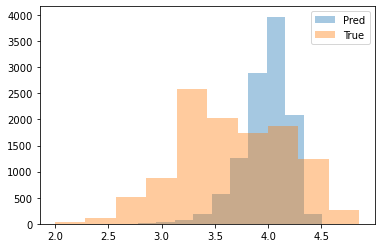

<IPython.core.display.Javascript object>

In [726]:
plt.hist(
    np.sum(preds * np.arange(1, 6)[None, :], axis=1) / np.sum(preds, axis=1),
    alpha=0.4,
    label="Pred",
)
true = ratings.detach().numpy()
plt.hist(
    np.sum(true * np.arange(1, 6)[None, :], axis=1) / np.sum(true, axis=1),
    alpha=0.4,
    label="True",
)
plt.legend()

In [727]:
with torch.no_grad():
    print(kl(ratings[val_indices].mean(axis=0)[None, :], ratings[val_indices]).mean())

tensor(5.9035)


<IPython.core.display.Javascript object>

In [728]:
with torch.no_grad():
    print(kl(ratings.mean(axis=0)[None, :], ratings).mean())

tensor(5.7388)


<IPython.core.display.Javascript object>

In [729]:
(5.90 - 5.09) / 5.90

0.13728813559322042

<IPython.core.display.Javascript object>

 ...]

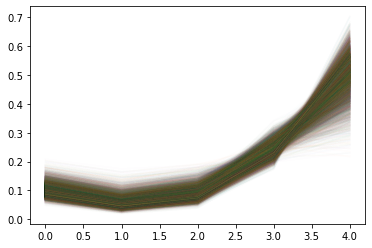

<IPython.core.display.Javascript object>

In [667]:
plt.plot((preds / np.sum(preds, axis=1)[:, None]).T, alpha=0.01)

In [730]:
from scipy.stats import ttest_ind

<IPython.core.display.Javascript object>

In [731]:
ttest_ind(
    np.sum(preds * np.arange(1, 6)[None, :], axis=1) / np.sum(preds, axis=1),
    np.sum(true * np.arange(1, 6)[None, :], axis=1) / np.sum(true, axis=1),
)

Ttest_indResult(statistic=61.8231480961264, pvalue=0.0)

<IPython.core.display.Javascript object>

**Do chi-square test on reviews simulated from the real and predicted distribution of product ratings**

# Try out just modelling the fraction of ratings in each bin

In [598]:
ratings = ratings / ratings.sum(axis=1)[:, None]
ratings

tensor([[0.0751, 0.0520, 0.1098, 0.2197, 0.5434],
        [0.1327, 0.0510, 0.0714, 0.2449, 0.5000],
        [0.0321, 0.0138, 0.0229, 0.2248, 0.7064],
        ...,
        [0.2222, 0.1111, 0.1111, 0.1111, 0.4444],
        [0.2857, 0.1429, 0.1429, 0.1429, 0.2857],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.3333]])

<IPython.core.display.Javascript object>

In [599]:
embeddings

tensor([[ 0.0001,  0.0001, -0.0027,  ...,  0.0010,  0.0040,  0.0017],
        [-0.0012, -0.0015, -0.0006,  ...,  0.0007,  0.0038,  0.0027],
        [ 0.0014, -0.0042, -0.0024,  ..., -0.0018,  0.0027, -0.0043],
        ...,
        [-0.0136, -0.0093,  0.0083,  ..., -0.0255,  0.0027, -0.0097],
        [-0.0133, -0.0195, -0.0198,  ...,  0.0014, -0.0079,  0.0077],
        [ 0.0004,  0.0004,  0.0007,  ...,  0.0020,  0.0008, -0.0012]])

<IPython.core.display.Javascript object>

In [602]:
modules = [
    torch.nn.Linear(100, 256),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(256, 128),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(128, 64),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(64, 5),
    torch.nn.LogSoftmax(dim=1),
]

<IPython.core.display.Javascript object>

In [603]:
net = torch.nn.Sequential(*modules)

<IPython.core.display.Javascript object>

In [604]:
class NNModel(torch.nn.Module):
    def __init__(self):
        super(NNModel, self).__init__()
        self.net = net
        self.best_model = None
        self.best_validation_loss = np.inf
        self.epochs_since_last_improvement = 0

    def forward(self, x):
        y_pred = self.net(x)
        return y_pred

<IPython.core.display.Javascript object>

In [605]:
model = NNModel()

<IPython.core.display.Javascript object>

In [606]:
criterion = torch.nn.KLDivLoss(reduction="batchmean")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

<IPython.core.display.Javascript object>

In [607]:
dataset = TensorDataset(embeddings, ratings)

<IPython.core.display.Javascript object>

In [608]:
validation_fraction = 0.1
num_total_examples = len(embeddings)
num_training_examples = int((1 - validation_fraction) * num_total_examples)
num_validation_examples = num_total_examples - num_training_examples

permuted_indices = torch.randperm(num_total_examples)
train_indices, val_indices = (
    permuted_indices[:num_training_examples],
    permuted_indices[num_training_examples:],
)
train_indices, val_indices

(tensor([ 1952,  5388,  1412,  ...,  2328,   755, 10406]),
 tensor([9004, 1916, 7481,  ..., 4204, 3844, 5365]))

<IPython.core.display.Javascript object>

In [609]:
train_indices.shape, val_indices.shape

(torch.Size([10155]), torch.Size([1129]))

<IPython.core.display.Javascript object>

In [610]:
dataloader_kwargs = None
training_batch_size = 50

train_loader_kwargs = {
    "batch_size": min(training_batch_size, num_training_examples),
    "drop_last": True,
    "sampler": sampler.SubsetRandomSampler(train_indices),
}
train_loader_kwargs = (
    dict(train_loader_kwargs, **dataloader_kwargs)
    if dataloader_kwargs is not None
    else train_loader_kwargs
)
val_loader_kwargs = {
    "batch_size": min(training_batch_size, num_validation_examples),
    "shuffle": False,
    "drop_last": True,
    "sampler": sampler.SubsetRandomSampler(val_indices),
}
val_loader_kwargs = (
    dict(val_loader_kwargs, **dataloader_kwargs)
    if dataloader_kwargs is not None
    else val_loader_kwargs
)

<IPython.core.display.Javascript object>

In [611]:
train_loader = DataLoader(dataset, **train_loader_kwargs)
val_loader = DataLoader(dataset, **val_loader_kwargs)

<IPython.core.display.Javascript object>

In [612]:
def converged(epoch, stop_after_epochs, validation_loss, model):
    converged = False
    # (Re)-start the epoch count with the first epoch or any improvement.
    if epoch == 0 or validation_loss < model.best_validation_loss:
        model.best_validation_loss = validation_loss
        model.epochs_since_last_improvement = 0
        model.best_model = copy.deepcopy(model.net.state_dict())
    else:
        model.epochs_since_last_improvement += 1

    # If no validation improvement over many epochs, stop training.
    if model.epochs_since_last_improvement > stop_after_epochs - 1:
        model.net.load_state_dict(model.best_model)
        converged = True
    return converged

<IPython.core.display.Javascript object>

In [613]:
# Run the training loop
for epoch in range(500):  # 5 epochs at maximum
    model.train()

    # Set current loss value
    train_loss = 0.0

    # Iterate over the DataLoader for training data
    for i, (inputs, targets) in enumerate(train_loader):

        # Zero the gradients
        optimizer.zero_grad()

        # Perform forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, targets)

        # Perform backward pass
        loss.backward()

        # Perform optimization
        optimizer.step()

        # Print statistics
        train_loss += loss.item() * len(inputs)
    train_loss /= len(train_indices)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(val_loader):
            preds = model(inputs)
            loss = criterion(preds, targets)
            val_loss += loss.item() * len(inputs)
        val_loss /= len(val_indices)

    if epoch % 20 == 0:
        print(f"Train Loss after epoch: {epoch}: {train_loss}")
        print(f"Validation loss after epoch: {epoch}: {val_loss}")
    if converged(epoch, 50, val_loss, model):
        print(
            f"Stopping after epoch {epoch} as validation loss was not improving further"
        )
        break

# Process is complete.
print("Training process has finished.")
print(f"Best loss: {model.best_validation_loss}")

Train Loss after epoch: 0: 0.11965023369286695
Validation loss after epoch: 0: 0.10804998943296759
Train Loss after epoch: 20: 0.042160683587112786
Validation loss after epoch: 20: 0.14903258080235407
Train Loss after epoch: 40: 0.019012180297781775
Validation loss after epoch: 40: 0.17202335374348982
Stopping after epoch 55 as validation loss was not improving further
Training process has finished.
Best loss: 0.10612950461485197


<IPython.core.display.Javascript object>

In [614]:
model.eval()
with torch.no_grad():
    preds = model(embeddings).detach().numpy()

<IPython.core.display.Javascript object>

In [615]:
preds

array([[-1.834317  , -2.1208062 , -1.9693673 , -1.4679078 , -1.0487076 ],
       [-1.8189766 , -2.0970259 , -1.9536047 , -1.4731475 , -1.0670493 ],
       [-1.8345171 , -2.1132245 , -1.9674327 , -1.4727013 , -1.0488477 ],
       ...,
       [-1.9517074 , -2.2639477 , -2.0677776 , -1.4385092 , -0.940887  ],
       [-2.0725565 , -2.37978   , -2.1812983 , -1.4665046 , -0.82567334],
       [-1.8023392 , -2.081836  , -1.9395472 , -1.4719574 , -1.087253  ]],
      dtype=float32)

<IPython.core.display.Javascript object>

In [616]:
np.exp(preds)

array([[0.15972255, 0.11993489, 0.13954511, 0.23040704, 0.35039032],
       [0.16219164, 0.12282117, 0.14176214, 0.22920291, 0.34402215],
       [0.15969059, 0.12084767, 0.13981535, 0.22930522, 0.3503412 ],
       ...,
       [0.14203137, 0.10393935, 0.12646653, 0.23728122, 0.3902815 ],
       [0.1258636 , 0.09257093, 0.11289488, 0.23073058, 0.43794   ],
       [0.16491267, 0.12470105, 0.14376903, 0.22947586, 0.33714136]],
      dtype=float32)

<IPython.core.display.Javascript object>

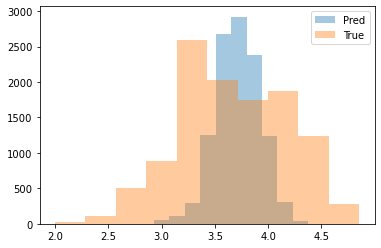

<IPython.core.display.Javascript object>

In [617]:
plt.hist(
    np.sum(np.exp(preds) * np.arange(1, 6)[None, :], axis=1)
    / np.sum(np.exp(preds), axis=1),
    alpha=0.4,
    label="Pred",
)
true = ratings.detach().numpy()
plt.hist(
    np.sum(true * np.arange(1, 6)[None, :], axis=1) / np.sum(true, axis=1),
    alpha=0.4,
    label="True",
)
plt.legend()

In [618]:
true

array([[0.07514451, 0.05202312, 0.10982659, 0.21965317, 0.5433526 ],
       [0.13265306, 0.05102041, 0.07142857, 0.24489796, 0.5       ],
       [0.03211009, 0.01376147, 0.02293578, 0.22477064, 0.70642203],
       ...,
       [0.22222222, 0.11111111, 0.11111111, 0.11111111, 0.44444445],
       [0.2857143 , 0.14285715, 0.14285715, 0.14285715, 0.2857143 ],
       [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.33333334]],
      dtype=float32)

<IPython.core.display.Javascript object>

 ...]

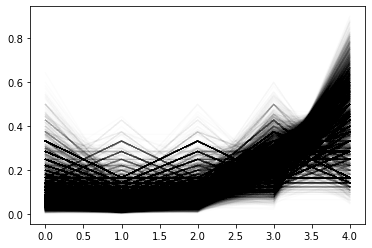

<IPython.core.display.Javascript object>

In [398]:
plt.plot(true.T, alpha=0.01, color="black")

 ...]

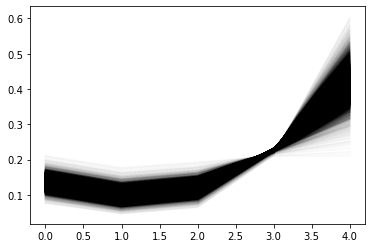

<IPython.core.display.Javascript object>

In [556]:
plt.plot(np.exp(preds).T, alpha=0.01, color="black")

(array([130.,   0., 108.,   0.,   0., 138.,   0., 238.,   0., 386.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

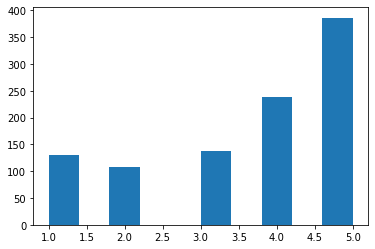

<IPython.core.display.Javascript object>

In [619]:
sim_true = []
for i in range(1000):
    j = np.random.randint(len(true))
    sim_true.append(np.random.choice(np.arange(1, 6), p=true[j, :]))
sim_true = np.array(sim_true)
plt.hist(sim_true)

(array([125.,   0., 107.,   0.,   0., 110.,   0., 235.,   0., 423.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

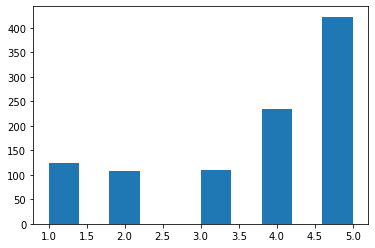

<IPython.core.display.Javascript object>

In [620]:
sim_preds = []
for i in range(1000):
    j = np.random.randint(len(preds))
    sim_preds.append(np.random.choice(np.arange(1, 6), p=np.exp(preds[j, :])))
sim_preds = np.array(sim_preds)
plt.hist(sim_preds)

In [621]:
preds

array([[-1.834317  , -2.1208062 , -1.9693673 , -1.4679078 , -1.0487076 ],
       [-1.8189766 , -2.0970259 , -1.9536047 , -1.4731475 , -1.0670493 ],
       [-1.8345171 , -2.1132245 , -1.9674327 , -1.4727013 , -1.0488477 ],
       ...,
       [-1.9517074 , -2.2639477 , -2.0677776 , -1.4385092 , -0.940887  ],
       [-2.0725565 , -2.37978   , -2.1812983 , -1.4665046 , -0.82567334],
       [-1.8023392 , -2.081836  , -1.9395472 , -1.4719574 , -1.087253  ]],
      dtype=float32)

<IPython.core.display.Javascript object>

In [631]:
kl_div = true * (np.log(true) - np.log(np.mean(true, axis=0))[None, :])

<IPython.core.display.Javascript object>

In [632]:
np.where(np.sum(kl_div, axis=1) <= 0)

(array([], dtype=int64),)

<IPython.core.display.Javascript object>

In [633]:
np.mean(np.sum(kl_div, axis=1))

0.11376517

<IPython.core.display.Javascript object>

In [625]:
idx = val_indices.detach().numpy()
idx

array([9004, 1916, 7481, ..., 4204, 3844, 5365])

<IPython.core.display.Javascript object>

In [628]:
kl_div = true[idx] * (np.log(true[idx]) - np.log(np.mean(true[idx], axis=0)[None, :]))

<IPython.core.display.Javascript object>

In [630]:
np.mean(np.sum(kl_div, axis=1))

0.114268154

<IPython.core.display.Javascript object>

In [634]:
(0.114 - 0.106) / 0.114

0.0701754385964913

<IPython.core.display.Javascript object>